### 查看数据

In [35]:
# 导入数据
data <- read.csv("stock.csv")

# 打印数据结构
str(data)

# 统计data数据框的行数
num_rows <- nrow(data)
print(num_rows)

'data.frame':	25160 obs. of  7 variables:
 $ Company   : chr  "AAPL" "AAPL" "AAPL" "AAPL" ...
 $ Date      : chr  "07/17/2023" "07/14/2023" "07/13/2023" "07-12-2023" ...
 $ Close.Last: chr  "$193.99" "$190.69" "$190.54" "$189.77" ...
 $ Volume    : int  50520160 41616240 41342340 60750250 46638120 59922160 46815000 45156010 46920260 31346600 ...
 $ Open      : chr  "$191.90" "$190.23" "$190.50" "$189.68" ...
 $ High      : chr  "$194.32" "$191.1799" "$191.19" "$191.70" ...
 $ Low       : chr  "$191.81" "$189.63" "$189.78" "$188.47" ...
[1] 25160


### 简单预处理
在这个数据集中，有一些预处理步骤可能需要进行：

1. 检查是否有缺失值
2. 将日期列从字符类型转换为日期类型。
3. 将公司名称转换为因子类型，因为它是一个分类变量。
4. 将Close.Last、Open、High和Low列中的美元符号去掉，并将这些列转换为数值类型。



In [36]:
# 检查data中是否有空值
if (any(is.na(data))) {
  print("There are NA values in the data frame.")
} else {
  print("There are no NA values in the data frame.")
}

[1] "There are no NA values in the data frame."


In [37]:
# 将日期字符串中的 "/" 和 "-" 替换为 "."
data$Date <- gsub("/|-", ".", data$Date)

# 将日期字符串的格式从 "mm.dd.yyyy" 转换为 "yyyy.mm.dd"
data$Date <- format(as.Date(data$Date, format = "%m.%d.%Y"), "%Y-%m-%d")

# 将日期字符串转换为日期
data$Date <- as.Date(data$Date)

# 检查Date列的数据类型
print(class(data$Date))

[1] "Date"


In [38]:
# 将Company列转换为因子类型
data$Company <- factor(data$Company)

# 查看Company列中的所有因子级别
company_levels <- levels(data$Company)
print(company_levels)

 [1] "AAPL" "AMD"  "AMZN" "CSCO" "META" "MSFT" "NFLX" "QCOM" "SBUX" "TSLA"


In [40]:
# 去掉美元符号并转换为数字
data$Open <- as.numeric(gsub("\\$", "", data$Open))
data$High <- as.numeric(gsub("\\$", "", data$High))
data$Low <- as.numeric(gsub("\\$", "", data$Low))
data$Close.Last <- as.numeric(gsub("\\$", "", data$Close.Last))

In [41]:
# 设置digits选项
options(digits = 10)
# 再次打印Close.Last列的前10个值检查小数
print(data$Close.Last[1:10])
# 检查全部数据类型是否达标
str(data)

 [1] 193.99 190.69 190.54 189.77 188.08 188.61 190.68 191.81 191.33 192.46
'data.frame':	25160 obs. of  7 variables:
 $ Company   : Factor w/ 10 levels "AAPL","AMD","AMZN",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Date      : Date, format: "2023-07-17" "2023-07-14" ...
 $ Close.Last: num  194 191 191 190 188 ...
 $ Volume    : int  50520160 41616240 41342340 60750250 46638120 59922160 46815000 45156010 46920260 31346600 ...
 $ Open      : num  192 190 190 190 189 ...
 $ High      : num  194 191 191 192 189 ...
 $ Low       : num  192 190 190 188 187 ...


### 可视化

In [8]:
# 安装必要的包
install.packages(c("ggplot2", "reshape2", "scales"))

# 加载必要的包
library(ggplot2)
library(reshape2)
library(scales)

package 'ggplot2' successfully unpacked and MD5 sums checked
package 'reshape2' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'reshape2'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying D:\Tools\R-4.3.1\library\00LOCK\reshape2\libs\x64\reshape2.dll to D:\Tools\R-4.3.1\library\reshape2\libs\x64\reshape2.dll: Permission denied"
Warning message:
"restored 'reshape2'"


package 'scales' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mayaa\AppData\Local\Temp\Rtmp6BO4KT\downloaded_packages


Warning message:
"package 'ggplot2' was built under R version 4.3.2"
Warning message:
"package 'reshape2' was built under R version 4.3.2"
Warning message:
"package 'scales' was built under R version 4.3.2"




然后，我们可以创建每个公司的股票价格随时间的折线图：



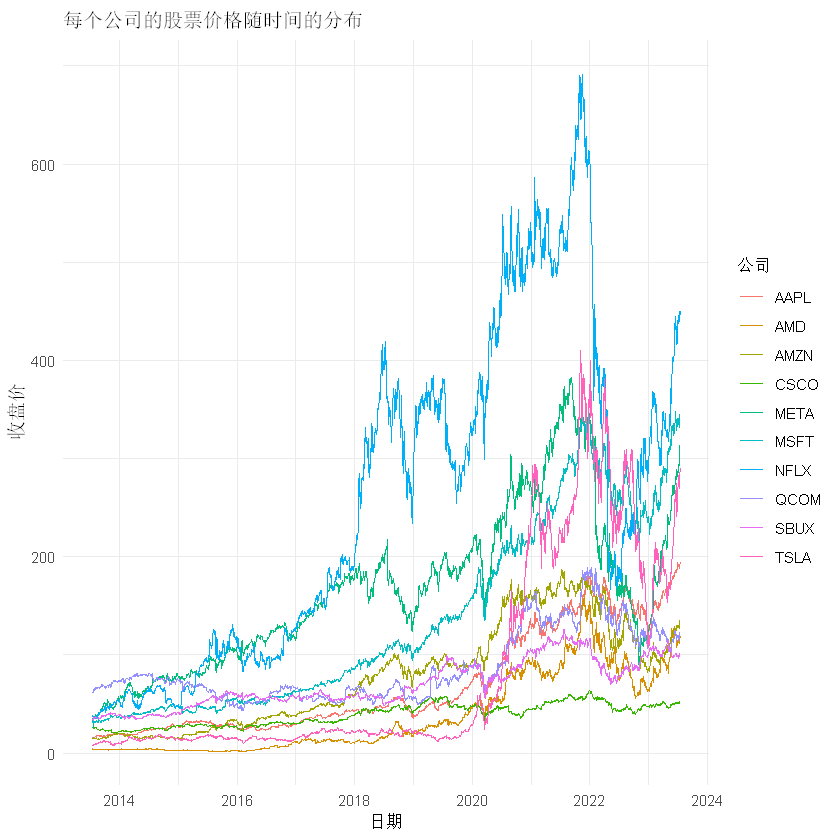

In [11]:
# 创建折线图
ggplot(data, aes(x = Date, y = Close.Last, color = Company)) +
  geom_line() +
  theme_minimal() +
  labs(title = "每个公司的股票价格随时间的分布", x = "日期", y = "收盘价", color = "公司")
  # 选择需要的列
  selected_data <- subset(data, select = c(Date, Close.Last, Company))

  # 导出数据为 CSV 文件
  write.csv(selected_data, file = "selected_data.csv", row.names = FALSE)



接下来，我们可以创建每个公司的平均股票价格的条形图：



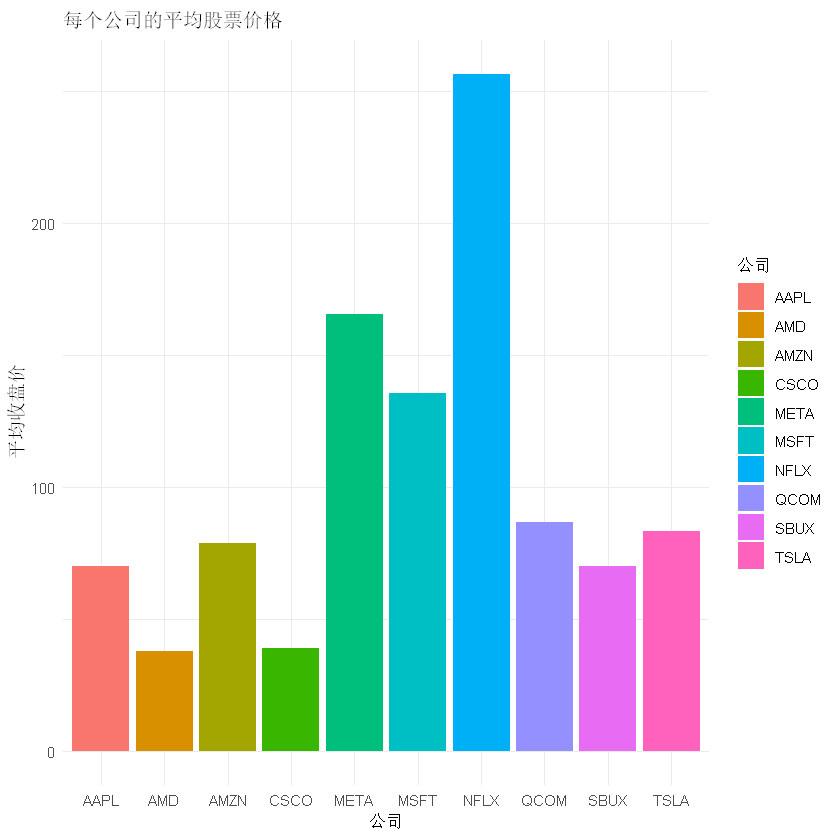

In [59]:
# 计算每个公司的平均股票价格
average_price <- aggregate(Close.Last ~ Company, data, mean)

# 导出数据为 CSV 文件
write.csv(average_price, file = "average_price.csv", row.names = FALSE)

# 创建条形图
ggplot(average_price, aes(x = Company, y = Close.Last, fill = Company)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "每个公司的平均股票价格", x = "公司", y = "平均收盘价", fill = "公司")



最后，我们可以创建每个日期的股票价格总和的热图。首先，我们需要将数据框转换为宽格式，然后再创建热图：



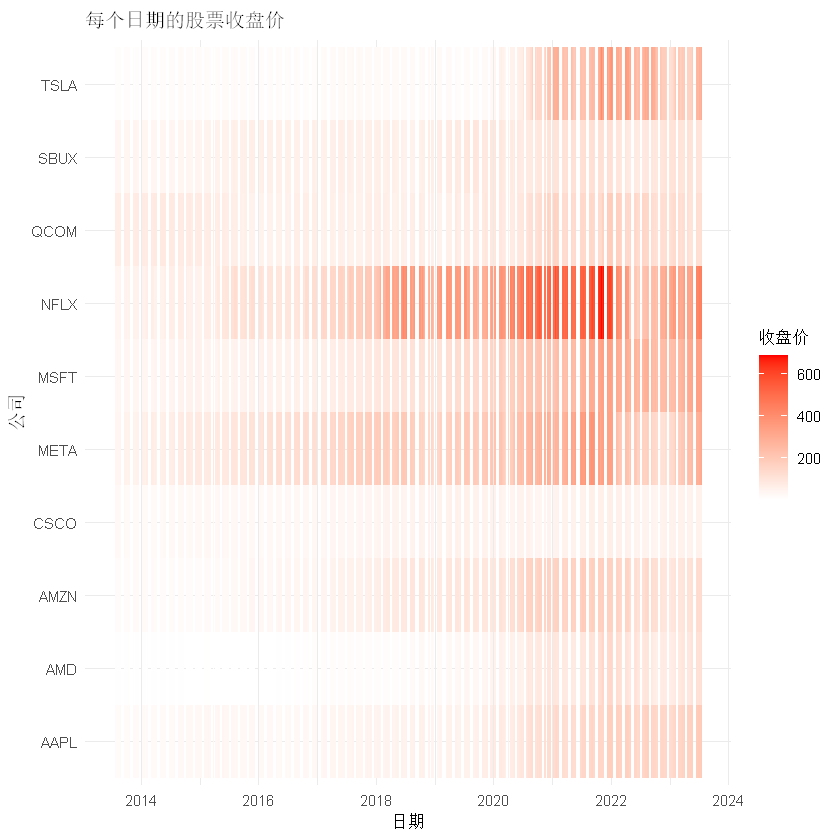

In [14]:
# 将数据框转换为宽格式
wide_data <- dcast(data, Date ~ Company, value.var = "Close.Last")


# 创建热图
ggplot(melt(wide_data, id.vars = "Date"), aes(x = Date, y = variable, fill = value)) +
  geom_tile() +
  theme_minimal() +
  scale_fill_gradient(low = "white", high = "red") +
  labs(title = "每个日期的股票收盘价", x = "日期", y = "公司", fill = "收盘价")

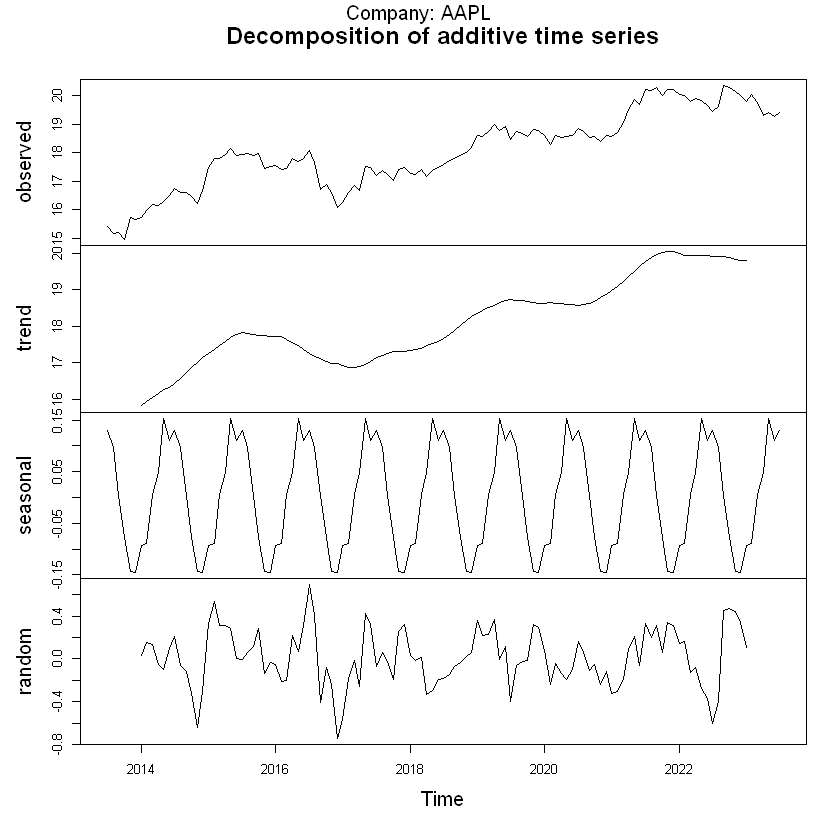

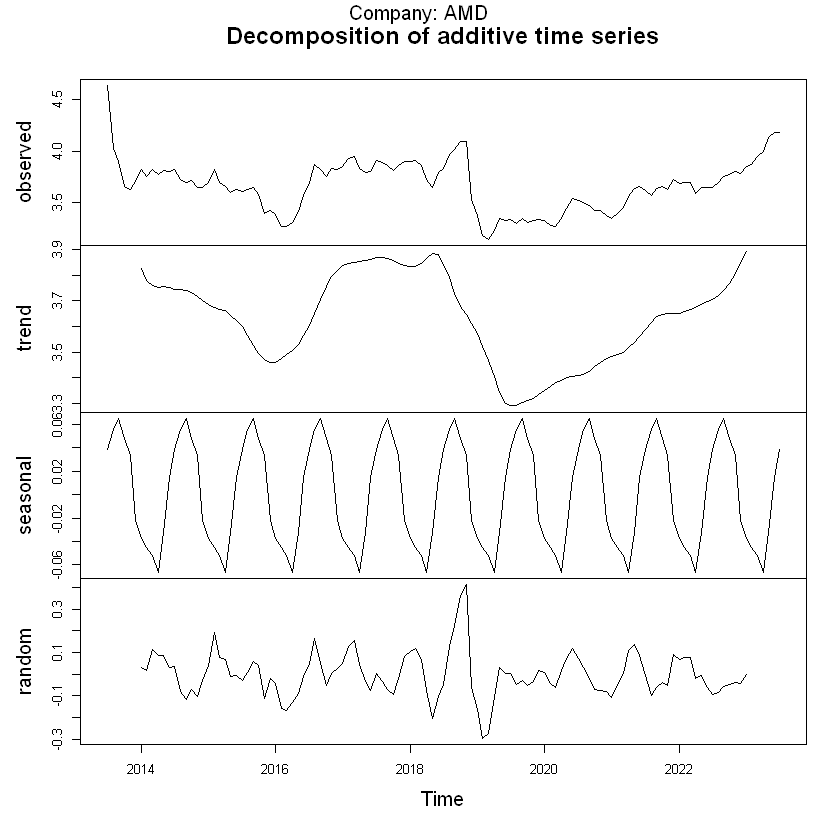

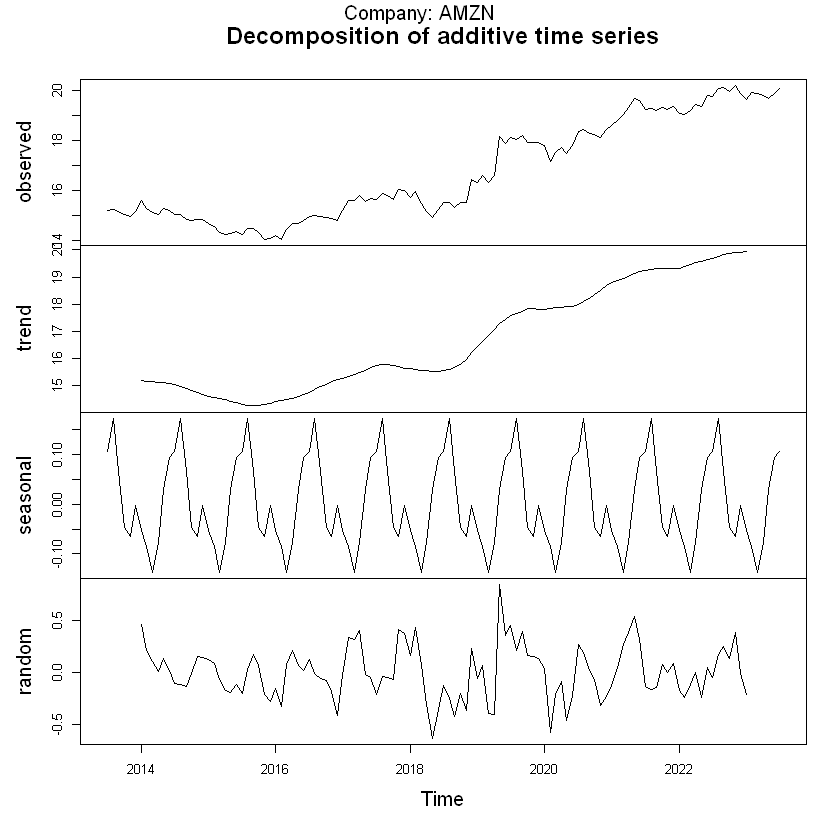

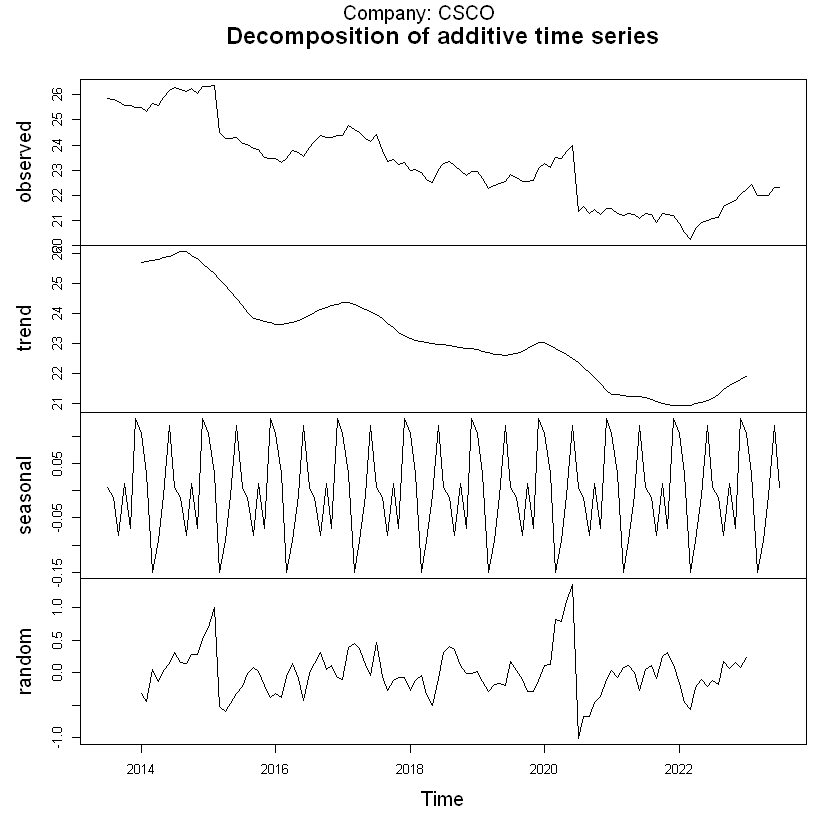

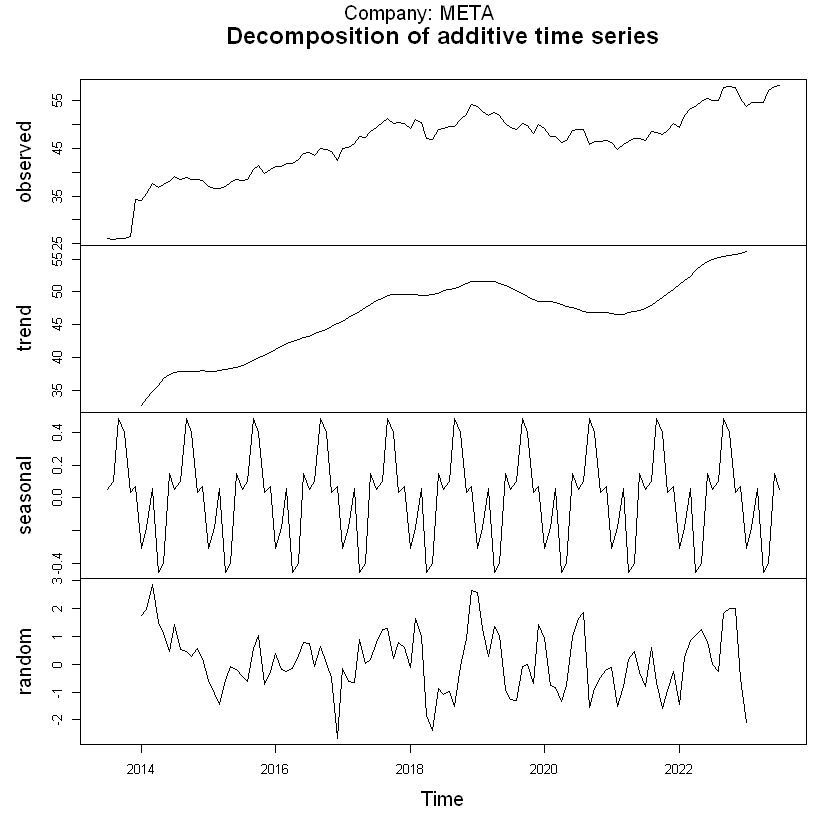

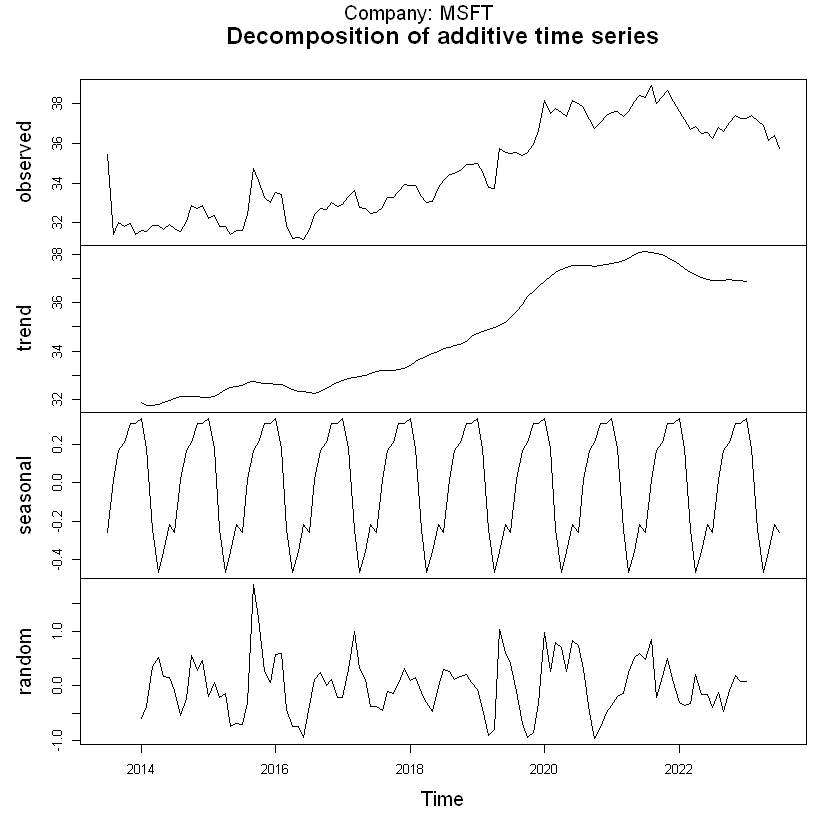

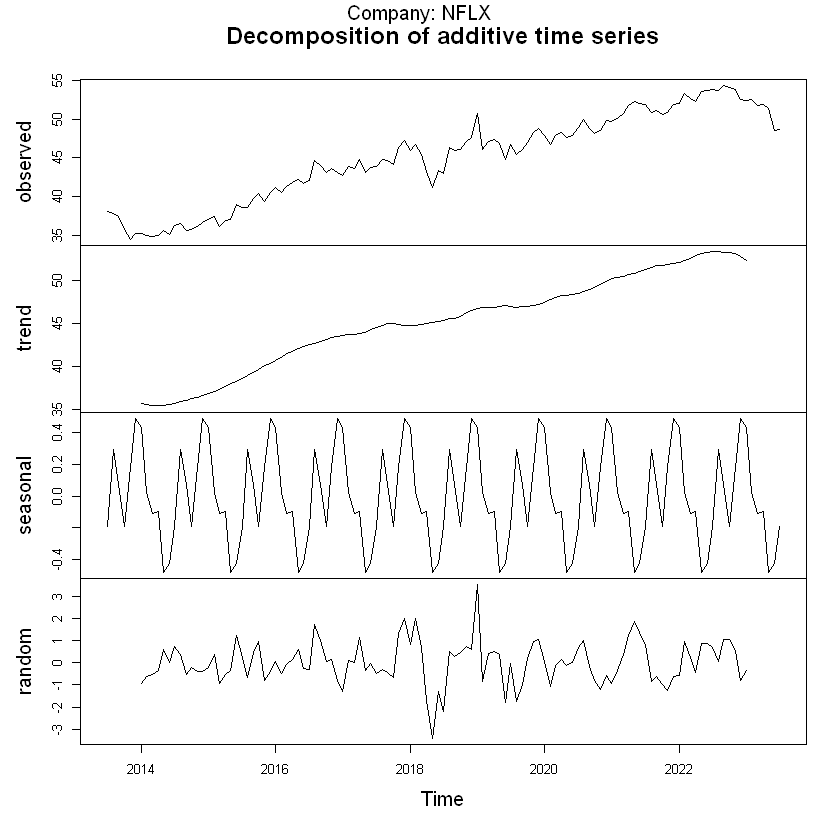

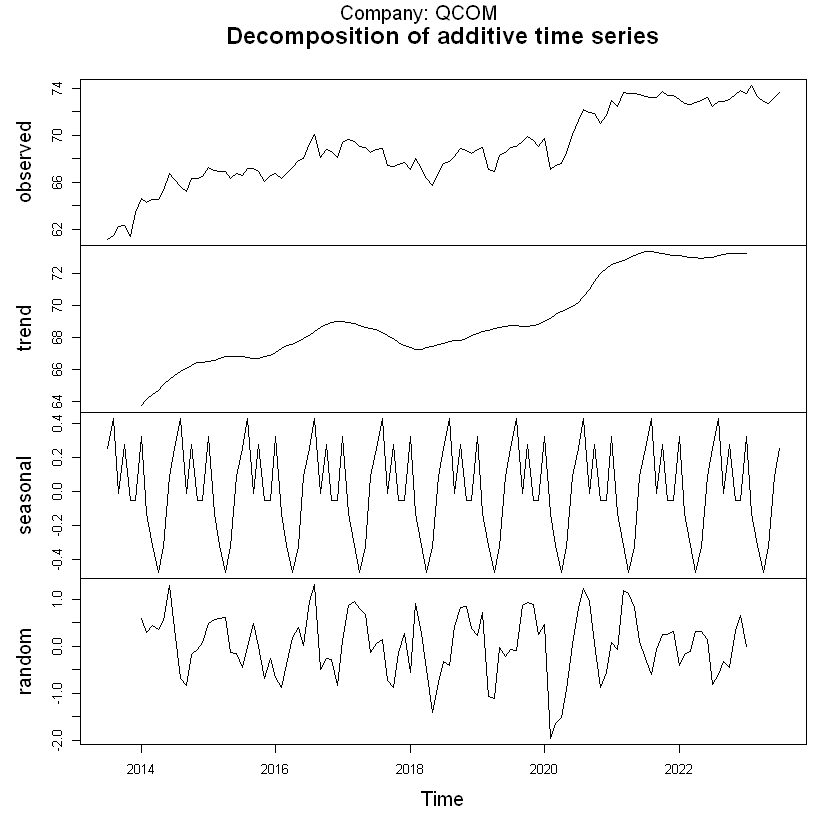

ERROR: [1m[33mError[39m in `do()`:[22m
[1m[22m[33m![39m Results 1, 2, 3, 4, 5, ... must be data frames, not NULL.


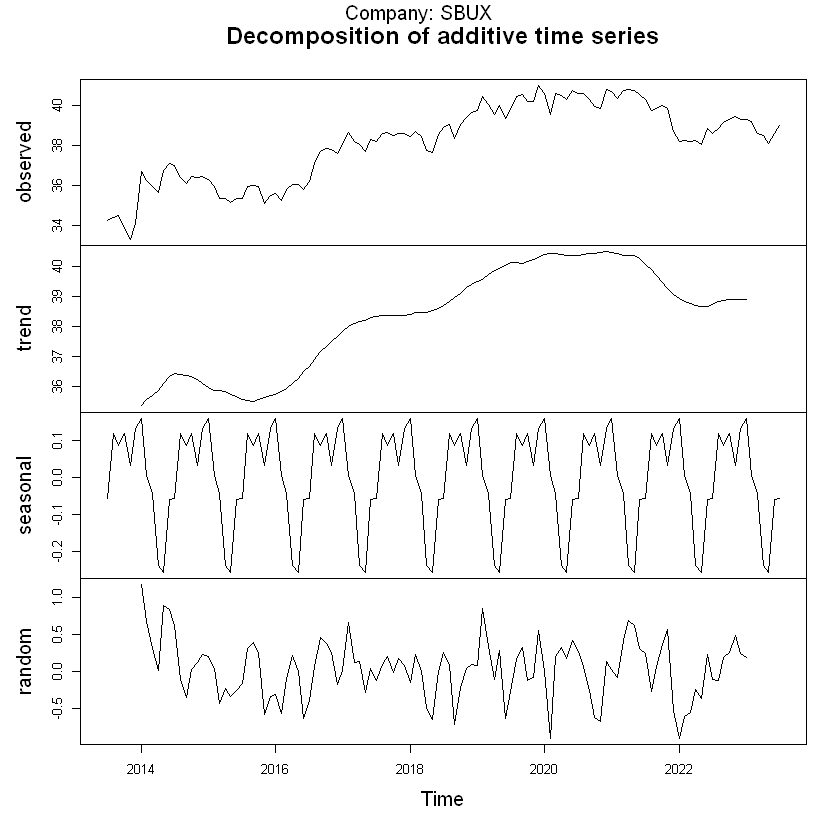

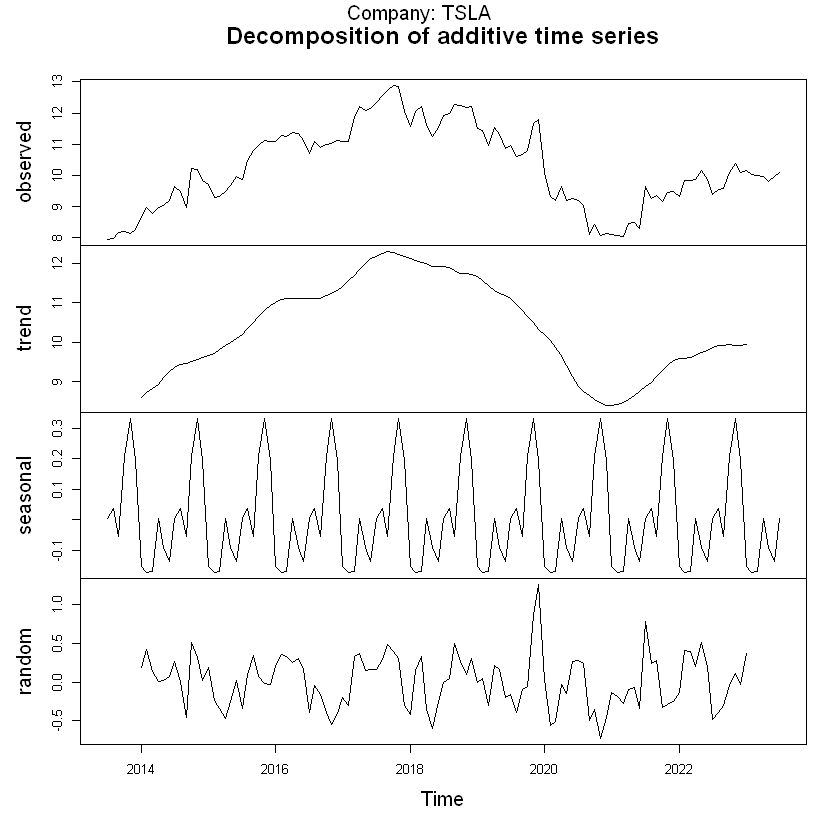

In [58]:
# 安装dplyr包
if (!require(dplyr)) {
    install.packages("dplyr")
}

# 加载dplyr包
library(dplyr)

data %>%
    group_by(Company) %>%
    do({
        # 将数据按日期排序
        .data <- .[order(.$Date), ]

        # 将Close.Last列转换为时间序列对象
        ts_data <- ts(.data$Close.Last,
            start = c(year(min(.data$Date)), month(min(.data$Date))),
            end = c(year(max(.data$Date)), month(max(.data$Date))),
            frequency = 12
        )

        # 使用decompose()函数分解时间序列
        decomposed_data <- decompose(ts_data)

        # 获取公司名字
        company_name <- unique(.data$Company)

        # 使用plot()函数绘制分解后的结果
        plot(decomposed_data)

        # 使用mtext()函数添加主标题
        mtext(paste("Company:", company_name), line = -1, outer = TRUE)
    })

### 相关性分析


In [15]:
# 安装corrplot包
install.packages("corrplot")

# 加载corrplot包
library(corrplot)

package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mayaa\AppData\Local\Temp\Rtmp6BO4KT\downloaded_packages


Warning message:
"package 'corrplot' was built under R version 4.3.2"
corrplot 0.92 loaded





然后，我们需要将数据框转换为宽格式，以便计算每个公司的收盘价之间的相关性。



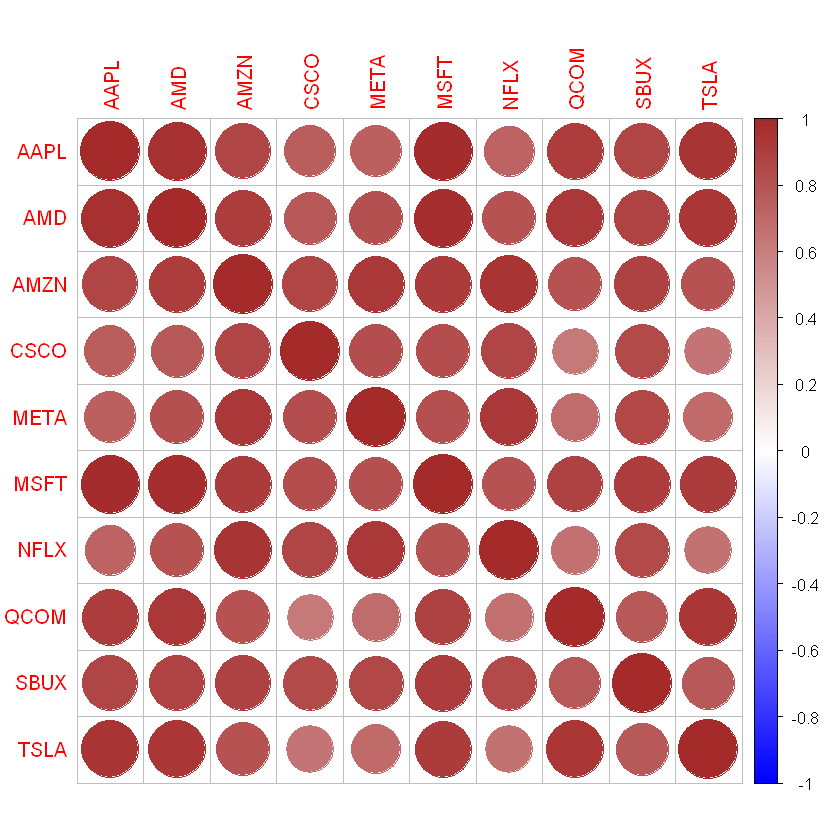

In [17]:
# 加载 corrplot 包
library(corrplot)

# 加载reshape2包
library(reshape2)

# 计算每个日期的股票价格总和
total_price <- aggregate(Close.Last ~ Date + Company, data, sum)

# 将数据框转换为宽格式
wide_data <- dcast(total_price, Date ~ Company, value.var = "Close.Last")

# 选择 wide_data 中数值类型的列
numeric_data <- wide_data[sapply(wide_data, is.numeric)]

# 计算相关系数
cor_matrix <- cor(numeric_data, use = "pairwise.complete.obs")

# 导出数据为 CSV 文件
write.csv(cor_matrix, file = "cor_matrix.csv")

# 生成颜色向量，使用白色到深棕色的渐变
col <- colorRampPalette(c("blue","white", "brown"))(200)

# 生成相关系数矩阵的可视化，使用修改后的颜色向量
corrplot(cor_matrix, method = "circle", col = col)



这段代码首先使用 `cor` 函数计算相关系数，然后使用 `corrplot` 函数生成相关系数矩阵的可视化。`method = "circle"` 参数表示使用圆形来表示相关系数，圆形的大小和颜色都与相关系数的绝对值成正比。

### 股票不动性分析

股票的不动性通常通过计算股票价格的波动率来衡量。波动率是一个统计指标，用于衡量股票价格的变动程度。波动率越高，股票的价格变动越大，不动性越低；反之，波动率越低，股票的价格变动越小，不动性越高。

可以使用 `quantmod` 包来计算股票的波动率。以下是相关的代码：

首先，我们需要安装和加载 `quantmod` 包。



In [18]:
# 安装quantmod包
install.packages("quantmod")

# 加载quantmod包
library(quantmod)

package 'quantmod' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mayaa\AppData\Local\Temp\Rtmp6BO4KT\downloaded_packages


Warning message:
"package 'quantmod' was built under R version 4.3.2"
Loading required package: xts

Warning message:
"package 'xts' was built under R version 4.3.2"
Loading required package: TTR

Warning message:
"package 'TTR' was built under R version 4.3.2"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 





然后，我们可以计算每个公司的股票价格的波动率。



In [19]:
# 创建一个空的数据框来存储结果
volatility <- data.frame(Company = character(), Volatility = numeric())

# 对每个公司计算波动率
for (company in unique(data$Company)) {
  # 提取该公司的数据
  company_data <- data[data$Company == company, ]
  
  # 计算波动率
  company_volatility <- sd(diff(log(company_data$Close.Last)))
  
  # 将结果添加到数据框中
  volatility <- rbind(volatility, data.frame(Company = company, Volatility = company_volatility))
}

# 打印结果
print(volatility)

   Company    Volatility
1     AAPL 0.01801410517
2     SBUX 0.01645709217
3     MSFT 0.01728596927
4     CSCO 0.01590200223
5     QCOM 0.02201225296
6     META 0.02461591531
7     AMZN 0.02074016214
8     TSLA 0.03538566020
9      AMD 0.03609368932
10    NFLX 0.02851525137




这段代码首先创建了一个空的数据框来存储结果，然后对每个公司计算波动率，并将结果添加到数据框中。计算波动率的方法是先计算股票价格的对数收益率，然后计算对数收益率的标准差。最后，打印结果。

注意，这种方法计算的是历史波动率，它是基于过去的股票价格数据的。

* 如果想预测未来的波动率，需要使用更复杂的模型，如下：

预测股票价格的波动率通常使用 GARCH（广义自回归条件异方差）模型。可以使用 `rugarch` 包来拟合 GARCH 模型。以下是相关的代码：

首先，我们需要安装和加载 `rugarch` 包。



In [20]:
# 安装rugarch包
install.packages("rugarch")

# 加载rugarch包
library(rugarch)

package 'rugarch' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rugarch'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying D:\Tools\R-4.3.1\library\00LOCK\rugarch\libs\x64\rugarch.dll to D:\Tools\R-4.3.1\library\rugarch\libs\x64\rugarch.dll: Permission denied"
Warning message:
"restored 'rugarch'"



The downloaded binary packages are in
	C:\Users\mayaa\AppData\Local\Temp\Rtmp6BO4KT\downloaded_packages


Warning message:
"package 'rugarch' was built under R version 4.3.2"
Loading required package: parallel


Attaching package: 'rugarch'


The following object is masked from 'package:stats':

    sigma






然后，我们可以对每个公司的股票价格拟合 GARCH 模型，并预测未来的波动率。



In [21]:
# 创建一个空的数据框来存储结果
forecast <- data.frame(Company = character(), Forecast = numeric())

# 对每个公司拟合 GARCH 模型并预测未来的波动率
for (company in unique(data$Company)) {
  # 提取该公司的数据
  company_data <- data[data$Company == company, ]
  
  # 计算对数收益率
  returns <- diff(log(company_data$Close.Last))
  
  # 拟合 GARCH 模型
  model <- ugarchspec(variance.model = list(model = "sGARCH", garchOrder = c(1, 1)), mean.model = list(armaOrder = c(0, 0), include.mean = FALSE), distribution.model = "std")
  fit <- ugarchfit(spec = model, data = returns)
  
  # 预测未来的波动率
  garch_forecast <- ugarchforecast(fit, n.ahead = 1)
  
  # 将结果添加到数据框中
  forecast <- rbind(forecast, data.frame(Company = company, Forecast = as.numeric(sigma(garch_forecast))))
}

# 打印结果
print(forecast)

   Company      Forecast
1     AAPL 0.01951982732
2     SBUX 0.02079594565
3     MSFT 0.04709125627
4     CSCO 0.01083973013
5     QCOM 0.01694945933
6     META 0.05711434991
7     AMZN 0.01471408986
8     TSLA 0.03505641088
9      AMD 0.06863908817
10    NFLX 0.02543479903




这段代码首先创建了一个空的数据框来存储结果，然后对每个公司的股票价格拟合 GARCH 模型，并预测未来的波动率。拟合 GARCH 模型的方法是先计算股票价格的对数收益率，然后使用 `ugarchspec` 和 `ugarchfit` 函数拟合 GARCH 模型。预测未来的波动率的方法是使用 `ugarchforecast` 函数，`n.ahead = 1` 参数表示预测未来 1 期的波动率。最后，将结果添加到数据框中，并打印结果。

### 推荐最佳潜力股

我们可以选择波动率较低（表示风险较低）和历史收益率较高（表示过去的表现良好）的股票。

以下展示了如何在 R 中使用这些指标来筛选潜力股：



In [ ]:
# 计算每个公司的历史收益率
returns <- data.frame(Company = character(), Return = numeric())
for (company in unique(data$Company)) {
  # 提取该公司的数据
  company_data <- data[data$Company == company, ]

  # 按日期排序
  company_data <- company_data[order(company_data$Date), ]

  # 计算收益率
  company_return <- (last(company_data$Close.Last) - first(company_data$Close.Last)) / first(company_data$Close.Last)

  # 将结果添加到数据框中
  returns <- rbind(returns, data.frame(Company = company, Return = company_return))
}

# 合并波动率和收益率
metrics <- merge(volatility, returns, by = "Company")

# 筛选波动率在前 25% 且收益率在后 25% 的公司
potential_stocks <- metrics[metrics$Volatility < quantile(metrics$Volatility, 0.5) & metrics$Return > quantile(metrics$Return, 0.5), ]

# 打印所有公司结果
print(metrics)

# 打印推荐结果
print(potential_stocks)

   Company    Volatility        Return
1     AAPL 0.01801410517 11.5804966310
2      AMD 0.03609368932 24.5000000000
3     AMZN 0.02074016214  7.7836638059
4     CSCO 0.01590200223  0.9648105182
5     META 0.02461591531 10.8647822765
6     MSFT 0.01728596927  8.7553611738
7     NFLX 0.02851525137 10.8251853720
8     QCOM 0.02201225296  1.0191442363
9     SBUX 0.01645709217  1.9477219626
10    TSLA 0.03538566020 35.5934495230
  Company    Volatility      Return
1    AAPL 0.01801410517 11.58049663




这段代码首先计算了每个公司的历史收益率，然后将波动率和收益率合并到一个数据框中。然后，它筛选出波动率在后 50% 且收益率在前 50% 的公司。这些公司的股票可能具有较高的潜力，因为它们的风险较低且过去的表现良好。

### 时间序列预处理

在R中，我们可以使用`plot`函数来绘制时间序列图。以下是如何绘制`Close.Last`列的时间序列图的代码：



`geom_smooth()` using formula = 'y ~ x'


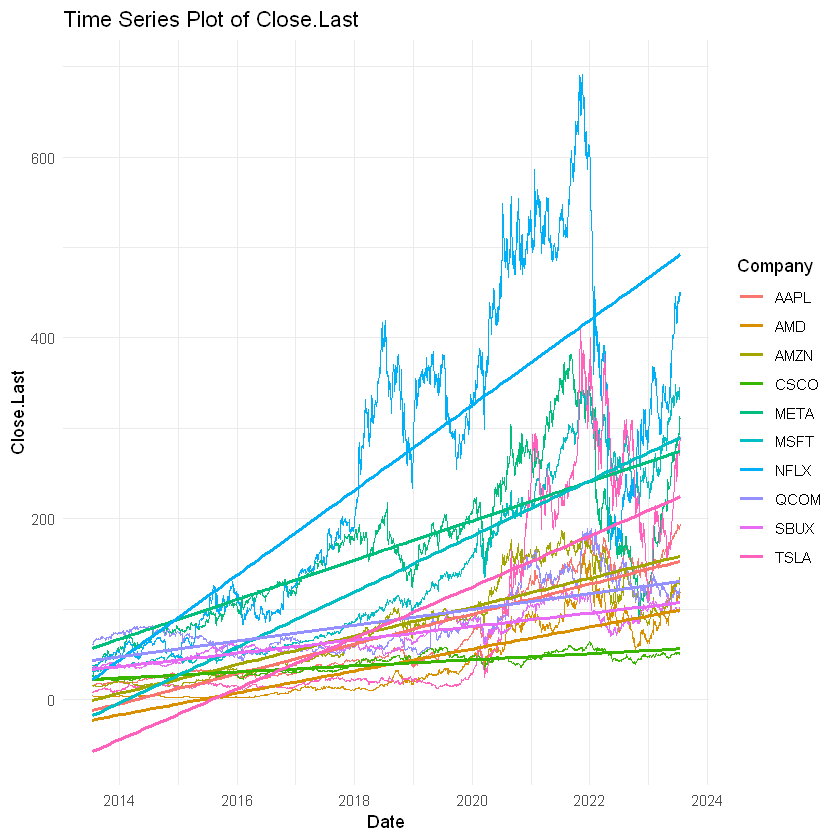

In [24]:
# 创建图形
ggplot(data, aes(x = Date, y = Close.Last, color = Company)) +
    geom_line() +
    geom_smooth(method = "lm", se = FALSE) + # 添加线性回归线
    labs(x = "Date", y = "Close.Last", title = "Time Series Plot of Close.Last") +
    theme_minimal()

显然，具有明显递增趋势和周期性规律，所以不是平稳序列。

在R中，我们可以使用`acf`函数来绘制自相关图。以下是如何绘制`Close.Last`列的自相关图的代码：



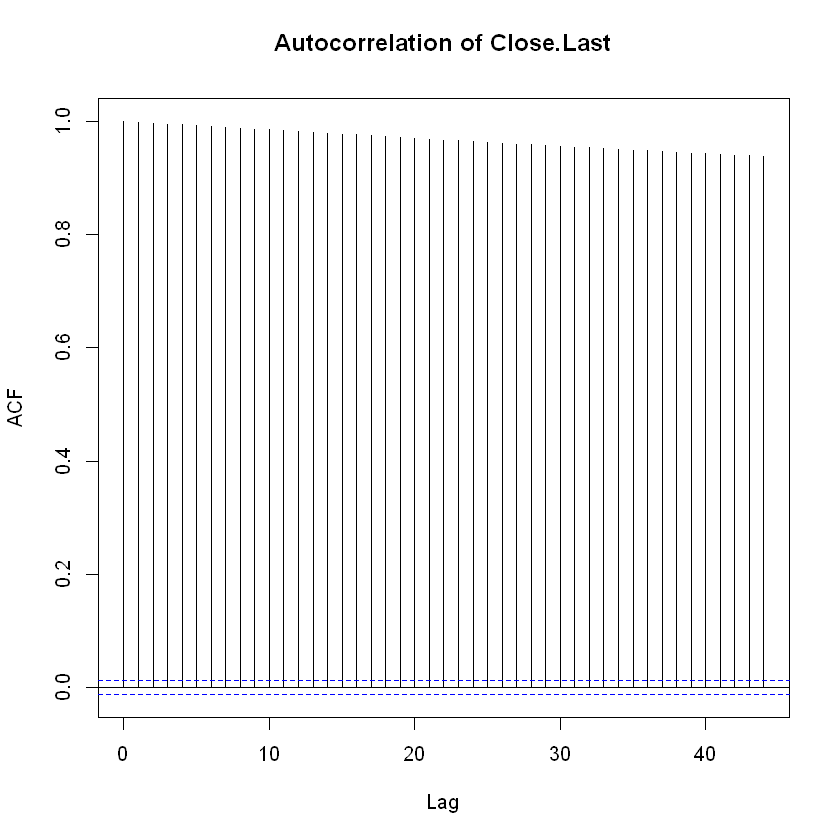

In [ ]:
# 绘制自相关图
acf(data$Close.Last, main="Autocorrelation of Close.Last")

显然，自相关系数长期在0轴一侧且一直较大且随Lag值增大而缓慢下降，说明有明显明显单调趋势，不是平稳序列。

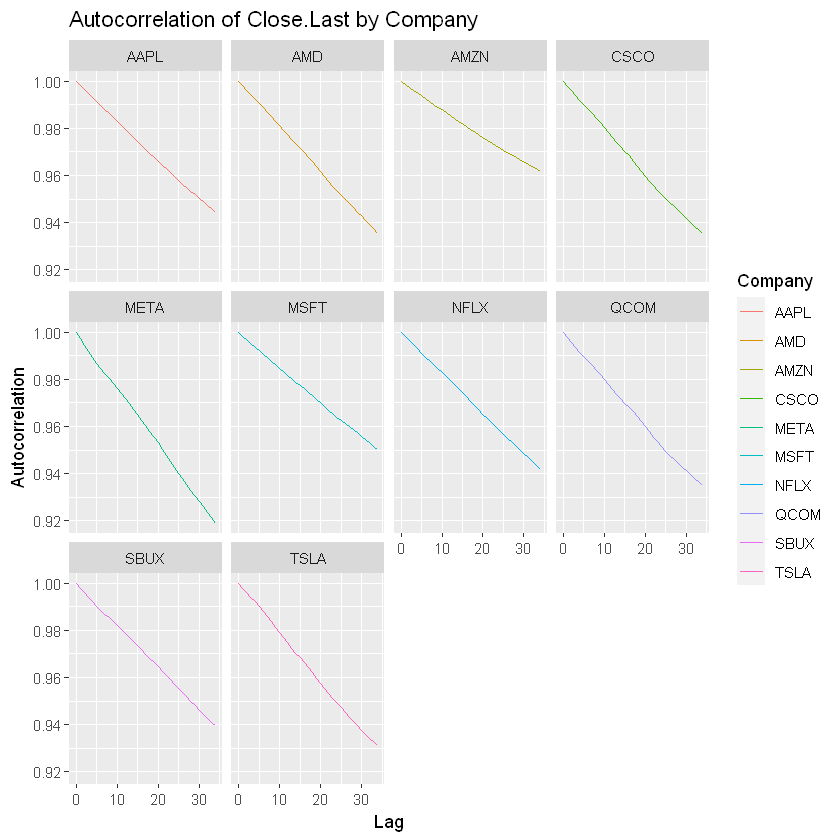

In [23]:
# 数据框名为 data，公司名的列名为 Company
companies <- unique(data$Company)

# 创建一个空的 ggplot 对象
p <- ggplot()

# 为每个公司生成自相关图
for (company in companies) {
    # 提取该公司的数据
    company_data <- data[data$Company == company, ]

    # 计算自相关系数
    acf_values <- acf(company_data$Close.Last, plot = FALSE)

    # 将自相关系数转换为数据框
    acf_df <- data.frame(Lag = acf_values$lag, ACF = acf_values$acf, Company = company)

    # 添加到 ggplot 对象
    p <- p + geom_line(data = acf_df, aes(x = Lag, y = ACF, color = Company))
}

# 添加标题和轴标签
p <- p + labs(x = "Lag", y = "Autocorrelation", title = "Autocorrelation of Close.Last by Company")

# 为每个公司生成单独的图
p <- p + facet_wrap(~Company)

# 打印图形
print(p)

### 纯随机性检验

在R中，我们可以使用`Box.test`函数（来自`stats`包）进行Box-Pierce或Ljung-Box白噪声检验，这是一种常用的纯随机性检验方法。以下是如何进行Ljung-Box白噪声检验的代码：



In [30]:
# 初始化一个空的数据框
result <- data.frame()

# 对不同的滞后阶数进行Ljung-Box白噪声检验
for (lag in c(5, 10, 15)) {
  test <- Box.test(data$Close.Last, lag = lag, type = "Ljung-Box")
  result <- rbind(result, data.frame(Lag = lag, QLB = test$statistic, PValue = test$p.value))
}
options(digits = 7)
# 打印结果
print(result)

           Lag      QLB PValue
X-squared    5 124648.0      0
X-squared1  10 247461.6      0
X-squared2  15 368486.6      0


显然，QLB值非常大，而P值非常小，该序列可以拒绝纯随机的原假设，可认为该序列蕴含着值得提取的相关信息，不是白噪声序列。